In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as mt
import seaborn as sns

# Read in dataset
df = pd.read_csv('titanic.csv',delimiter=',')

In [ ]:
df.head(5)

# When To Use Machine Learning
Machine learning is a powerful tool that teaches a learning model to recognize patterns in a set of data. For many problems, ML is applicable but sometimes it isn't. If the task is relitavely simple and the rules are codable (like chess for example) a machine learning algorithm isn't neccessary (although in the case of chess, it turned out that ML based engines were acutally stronger than maually coded engines because the values of certain characteristics of positions like semi-open files and unmoved pawns were given more accurately by ever-updating neural networks vs the static choices of human programmers). However when the task requires rules that are not really codable (very abstract concepts or certain patterns that a human would easily recognize but a computer wouldn't) it is a good idea to use ML and let the computer figure out its own rules as opposed to spending hours codinf the rules yourself. ML is also useful when a task cannot be easily scaled like recognizing spam emails, and letting the computer look for patterns in the spam is much more time efficient than a person going through thousands of emails to detect whether or not they are spam.

Numpy Arrays Might be useful later. 
Age and Fare needs cleaning, figure out what to do about nan and the periods at the end of the numbers.

In [4]:

Pclass = df.Pclass.to_numpy()
Survived = df.Survived.to_numpy()
Sex = df.Sex.to_numpy()
Age = df.Age.to_numpy()
Fare = df.Fare.to_numpy()
Pclass = df.Pclass.to_numpy()
Gender = pd.get_dummies(df.Sex)

creates useful functions that make a numpy list into a list of either integers or floats recognized by python
(Also replaces null values with the mean of the list)

In [5]:

def to_pyint(list):
    dummylist = []
    newlist = []
    for item in list:
        try: dummylist.append(int(item.item()))
        except: pass
    listmean = mt.floor((np.mean(dummylist)).item())
    for item in list:
        try: newlist.append(int(item.item()))
        except: newlist.append(listmean)
    return newlist
def to_pyfloat(list):
    dummylist = []
    newlist = []
    for item in list:
        try: dummylist.append(float(item.item()))
        except: pass
    listmean = (np.mean(dummylist)).item()
    for item in list:
        try: newlist.append(float(item.item()))
        except: newlist.append(listmean)
    return newlist


In [6]:
#Revalue
Fare = to_pyfloat(Fare)
Age = to_pyint(Age)
Survived = to_pyint(Survived)
Pclass = to_pyint(Pclass)
Gender = np.multiply(Gender["male"].to_numpy(), 1).tolist()

<Axes: >

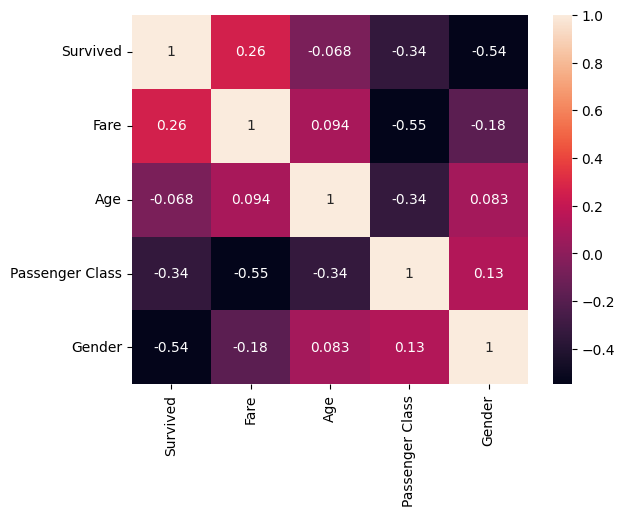

In [7]:
corrdf = pd.DataFrame({"Survived": Survived,
                       "Fare": Fare,
                       "Age": Age,
                       "Passenger Class": Pclass,
                       "Gender": Gender
                       })
sns.heatmap(corrdf.corr(), annot=True)

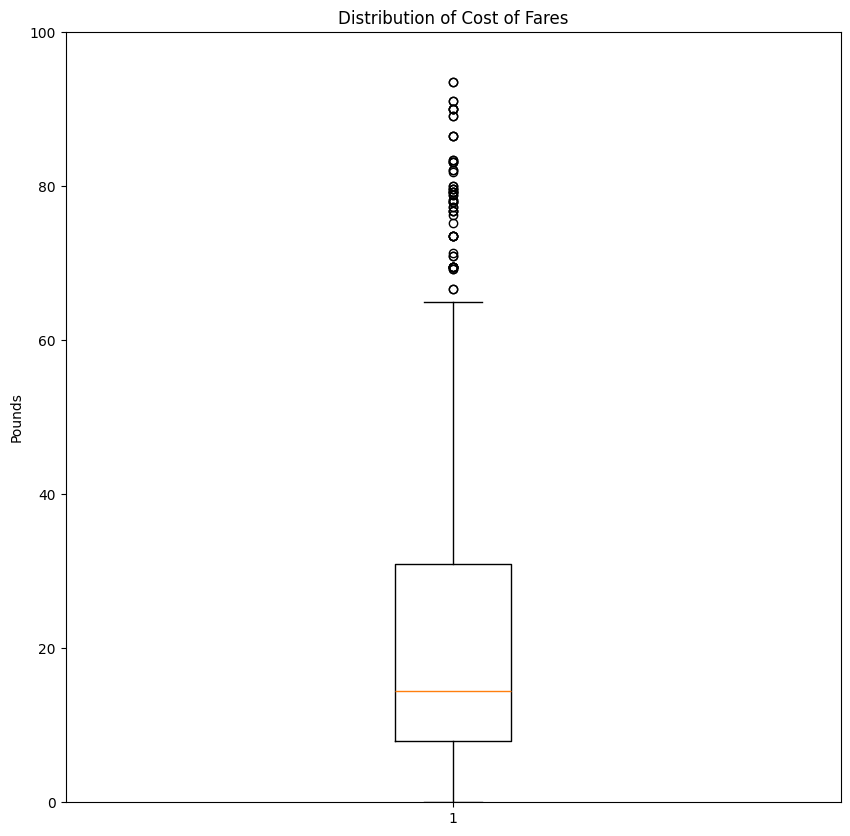

In [8]:
FareFigure = plt.figure(figsize = (10, 10))
# Creating plot
plt.boxplot(Fare)
plt.title("Distribution of Cost of Fares")
plt.ylabel("Pounds")
plt.ylim(0,100)


# show plot
plt.show()

#Question 5

In [11]:
binnedages = df["Age"].apply(lambda x: "0-8" if x<=8
                    else "9-13" if x<=13
                    else "14-51" if x<=51
                    else "51+")



Question 6 

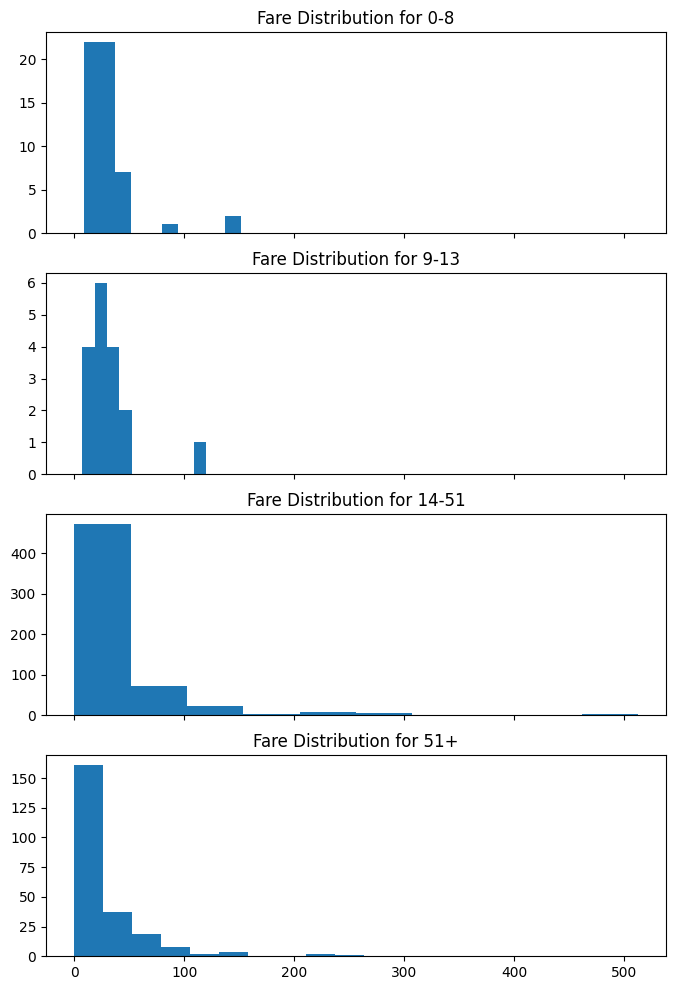

In [13]:
#6.
fig, axes = plt.subplots(4, 1, figsize=(8, 12), sharex=True)

age_groups = ["0-8", "9-13", "14-51", "51+"]
counter = 0

for group in age_groups:
    axes[counter].hist(df[binnedages == group]['Fare'])
    axes[counter].set_title(f'Fare Distribution for {group}')
    counter += 1

plt.show()

# Summary
Plotting the correlations between survival and other variables yielded a highest correlation between survival and sex at aprrox. -0.54 towards women. This was to be expected since women and children were first on the lifeboats. Another good variable might have been cabin numbers (floors) because of the way the ship sank but too much data was missing to make any meaningful conclusions. Fare distributions were interesting (Average fare 18pds, inner quartile range +- 10 pounds from the mean, but very many outliers on the top). Ages (not including the children 0-13) had a wide range but 51+ people had a more consisently high fare whereas 14-51 had a large distrubution but more outliers.